# BUSINESS PROBLEM

In [1]:
#In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency
#is expected to peak in the third quarter of 2006 (Chou,2006).
#In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants.
#At the same time, most cardholders, irrespective of their repayment ability,
#overused credit card for consumption and accumulated heavy credit and cash–card debts. 
#The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

In [ ]:
#Column Information
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 
                                            2=payment delay for two months,8=payment delay for eight - months,
                                            9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns',None) #to see all columns

In [36]:
card_data=pd.read_csv(r"D://kaggle datasets//banking dataset//Credit Card Defaulter Prediction.csv")

In [37]:
card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [38]:
card_data.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

In [41]:
card_data['default '].value_counts()

N    23364
Y     6636
Name: default , dtype: int64

In [42]:
card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [43]:
card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [44]:
card_data.tail()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,29996,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y
29999,30000,50000,M,University,Married,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,Y


In [45]:
card_data.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
card_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

In [46]:
card_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [47]:
card_data=card_data.drop("ID",axis=1)

In [48]:
card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [49]:
card_data.corr()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256


# Exploratory Data Analysis

<AxesSubplot:>

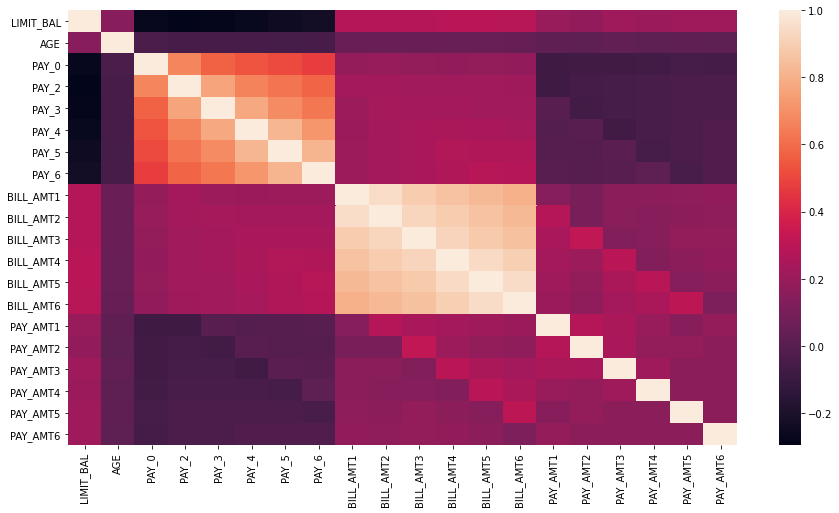

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(card_data.corr())

In [51]:
card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,N
29997,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [ ]:
# Distribution of Limit balance
### we will use box plot with histogram to know better the distribution



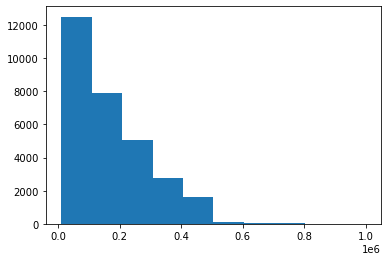

In [52]:
Fig1=plt.hist('LIMIT_BAL', data=card_data)
           
        

In [ ]:
# LIMIT_BAL feature looks more right skewed 

C:\Users\Darshil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LIMIT_BAL'>

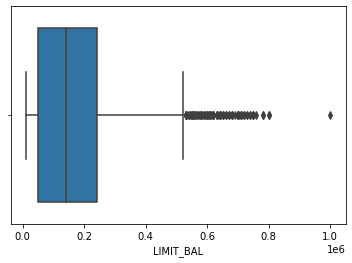

In [53]:
sns.boxplot('LIMIT_BAL',data=card_data)

C:\Users\Darshil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

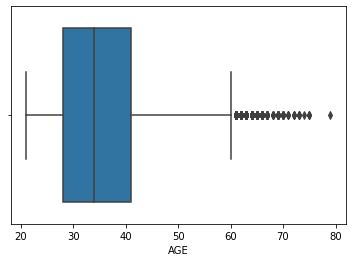

In [54]:

sns.boxplot('AGE', data=card_data)

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

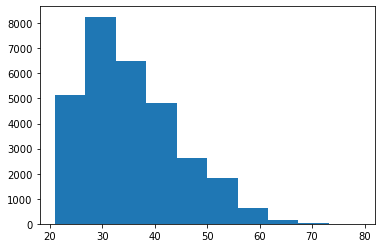

In [55]:
plt.hist(x='AGE', data=card_data)

In [ ]:
# AGE FEATURE LOOKS MORE RIGHT SKEWED

In [ ]:
# FOR CATEGORICAL FEATURES

<AxesSubplot:xlabel='SEX', ylabel='count'>

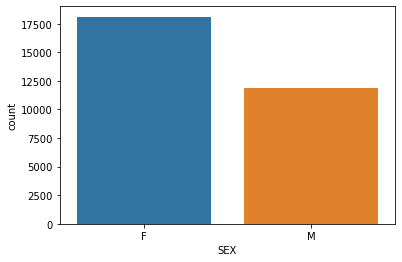

In [56]:
sns.countplot(x='SEX',data=card_data)

In [ ]:
# female more used credit card

In [19]:
card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,30000,M,University,Single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,80000,M,High School,Married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [20]:
card_data['SEX'].value_counts()

F    18112
M    11888
Name: SEX, dtype: int64

In [21]:
card_data['EDUCATION'].value_counts()

University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

In [22]:
card_data['MARRIAGE'].value_counts()

Single     15964
Married    13659
Other        323
0             54
Name: MARRIAGE, dtype: int64

In [57]:
card_data['default '].value_counts()

N    23364
Y     6636
Name: default , dtype: int64

# PREPARE DATA

In [60]:
y = card_data.iloc[:,23]

In [59]:
y

0        Y
1        Y
2        N
3        N
4        N
        ..
29995    N
29996    N
29997    Y
29998    Y
29999    Y
Name: default , Length: 30000, dtype: object

In [61]:
y=pd.get_dummies(card_data['default '])

In [62]:
y

,N,Y
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
29995,1,0
29996,1,0
29997,0,1
29998,0,1


In [64]:
y=y.drop('N', axis=1)

In [65]:
y

,Y
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [66]:
y.shape

(30000, 1)

In [67]:
y=y.iloc[:,0]

In [68]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: uint8

In [78]:
X= card_data.iloc[:,0:23]

In [79]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,M,University,Single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,M,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
# GET DUMMIES FOR CATEGORICAL COLUMNS

In [80]:
X= pd.get_dummies(X, columns=['SEX','EDUCATION','MARRIAGE'])

In [81]:
X

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_F,SEX_M,EDUCATION_0,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,1,0,0,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,0,1,0,0,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,0,1,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1,0,0,1,0,0,0,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,0,0,1,0,0,0,0,0,0,1
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,0,1,0,0,0,0,1,0,0,0,0,1
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,0,1,0,0,1,0,0,0,0,1,0,0


In [82]:
X=X.drop('EDUCATION_0',axis=1)

In [83]:
X

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_F,SEX_M,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1,0,1,0,0,0,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,0,1,0,0,0,0,0,0,1
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,0,1,0,0,0,1,0,0,0,0,1
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,0,1,0,1,0,0,0,0,1,0,0


In [84]:
X.shape

(30000, 31)

In [85]:
y=y.values

In [86]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [87]:
X=X.values

In [88]:
X

array([[ 20000,     24,      2, ...,      1,      0,      0],
       [120000,     26,     -1, ...,      0,      0,      1],
       [ 90000,     34,      0, ...,      0,      0,      1],
       ...,
       [ 30000,     37,      4, ...,      0,      0,      1],
       [ 80000,     41,      1, ...,      1,      0,      0],
       [ 50000,     46,      0, ...,      1,      0,      0]], dtype=int64)

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
SC_X=StandardScaler()

In [106]:
X=SC_X.fit_transform(X)

In [107]:
X

array([[-1.13672015, -1.24601985,  1.79456386, ...,  1.09377971,
        -0.10432569, -1.06647132],
       [-0.3659805 , -1.02904717, -0.87499115, ..., -0.91426088,
        -0.10432569,  0.93767172],
       [-0.59720239, -0.16115646,  0.01486052, ..., -0.91426088,
        -0.10432569,  0.93767172],
       ...,
       [-1.05964618,  0.16430256,  3.57426721, ..., -0.91426088,
        -0.10432569,  0.93767172],
       [-0.67427636,  0.59824792,  0.90471219, ...,  1.09377971,
        -0.10432569, -1.06647132],
       [-0.90549825,  1.14067961,  0.01486052, ...,  1.09377971,
        -0.10432569, -1.06647132]])

# Create Model

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=111)

In [110]:
X_train

array([[-0.90549825, -0.48661547,  0.01486052, ..., -0.91426088,
        -0.10432569,  0.93767172],
       [-1.21379411,  2.00857033,  3.57426721, ...,  1.09377971,
        -0.10432569, -1.06647132],
       [-0.90549825,  0.38127524,  0.01486052, ..., -0.91426088,
        -0.10432569,  0.93767172],
       ...,
       [-0.59720239, -0.70358815,  0.01486052, ..., -0.91426088,
        -0.10432569,  0.93767172],
       [-0.90549825,  0.59824792,  1.79456386, ...,  1.09377971,
        -0.10432569, -1.06647132],
       [-0.3659805 ,  1.14067961,  0.01486052, ...,  1.09377971,
        -0.10432569, -1.06647132]])

In [111]:
X_train.shape

(24000, 31)

In [112]:
X_test.shape

(6000, 31)

In [113]:
y_train.shape

(24000,)

In [114]:
y_test.shape

(6000,)

# Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
card_data_lr=LogisticRegression()

In [117]:
card_data_lr.fit(X_train,y_train)

LogisticRegression()

In [119]:
y_pred= card_data_lr.predict(X_test)

In [120]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [121]:
y_pred.shape

(6000,)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(y_test,y_pred)

0.8131666666666667

In [ ]:
# The accuracy score in logistic regression is 81%

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test,y_pred)

array([[4590,  114],
       [1007,  289]], dtype=int64)

In [ ]:
# true positive is 4590 which is 76.5% of total credit card holders.  

# Decision Tree 

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
decision_tree = DecisionTreeClassifier()

In [130]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [132]:
y_pred_dt= decision_tree.predict(X_test)

In [133]:
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [134]:
accuracy_score(y_test,y_pred_dt)

0.73

In [ ]:
# accuracy score from decision tree is 73%

# Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
random_forest = RandomForestClassifier()

In [138]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [139]:
random_forest_predict=random_forest.predict(X_test)

In [140]:
random_forest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [141]:
accuracy_score(y_test,random_forest_predict)

0.8193333333333334

In [ ]:
# Accuracy score from random forest is 81%

In [ ]:
# from logistic regression and random forest we got same percentage of credit card defaulters.